In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from bnbML.Supervised_Learning.Classification import BinaryLogisticRegression
from bnbML.Utils.Metrics import accuracy
from bnbML.Utils.PreProcessing import normalize

In [2]:
df = pd.read_csv('~/Downloads/breast-cancer-wisconsin.data', header=None)
df = df.drop([0], axis=1)
for x in range(1, 11):
    df = df[df[x] != '?']
df.head()

/home/artistbanda/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
df.describe()

,1,2,3,4,5,7,8,9,10
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


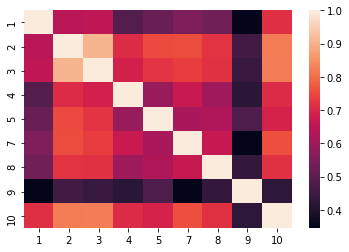

In [4]:
sns.heatmap(df.corr())

In [5]:
X_train = df.drop([6, 9, 10], axis=1)[:int(df.shape[0]*0.85)].values
y_train = np.where(df[10] == 2, 0, 1)[:int(df.shape[0]*0.85)]
y_train = np.reshape(y_train, (len(y_train), 1))

X_test = df.drop([6, 9, 10], axis=1)[int(df.shape[0]*0.85):].values
y_test = np.where(df[10] == 2, 0, 1)[int(df.shape[0]*0.85):]
y_test = np.reshape(y_test, (len(y_test), 1))

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(580, 7) (580, 1)
(103, 7) (103, 1)


100% (70 of 70) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Accuracy : 62.41379310344828
Accuracy : 37.58620689655172
Accuracy : 62.41379310344828
Accuracy : 37.58620689655172
Accuracy : 37.58620689655172
Accuracy : 62.41379310344828
Accuracy : 37.58620689655172
Accuracy : 51.89655172413793
Accuracy : 76.0344827586207
Accuracy : 37.58620689655172
Accuracy : 78.79310344827586
Accuracy : 44.48275862068966
Accuracy : 79.48275862068965
Accuracy : 48.44827586206897
Accuracy : 81.72413793103448
Accuracy : 66.89655172413794
Accuracy : 84.6551724137931
Accuracy : 82.93103448275862
Accuracy : 85.17241379310346
Accuracy : 84.6551724137931
Accuracy : 85.86206896551725
Accuracy : 85.34482758620689
Accuracy : 86.89655172413792
Accuracy : 86.03448275862068
Accuracy : 87.41379310344828
Accuracy : 85.51724137931035
Accuracy : 87.58620689655172
Accuracy : 84.13793103448276
Accuracy : 85.86206896551725
Accuracy : 73.9655172413793
Accuracy : 81.72413793103448
Accuracy : 38.275862068965516
Accuracy : 75.3448275862069
Accuracy : 37.75862068965517
Accuracy : 85.8620

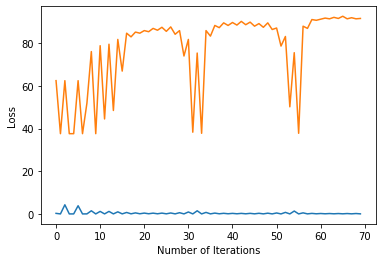

In [6]:
clf_1 = BinaryLogisticRegression()
clf_1.fit(X_train, y_train, epochs=70)
clf_1.plotLossGraph()

In [9]:
print("Train Accuracy :",accuracy(y_train, clf_1.predict(X_train)))
print("Test Accuracy :",accuracy(y_test, clf_1.predict(X_test)))

Train Accuracy : 91.20689655172414
Test Accuracy : 98.05825242718447
